# Convolutional Neural Networks

- Create a mood classifer using the TF Keras Sequential API
- Build a ConvNet to identify sign language digits using the TF Keras Functional API

## Table of Contents

- [1 - Packages](#1)
- [2 - Happy Data](#2)
    - [2.2 - Load and Split the Data into Train/Test Sets](#2-1)
    - [2.2 - Happay data image display](#2-2)
- [3 - The Sequenstial API](#2)
    - [3.1 - Happay Model](#2-1)
    - [3.2 - Train and Evaluate the Model](#2-2)
- [4 - Sign Data](#4)
    - [4.1 - Load and Split the Data into Train/Test Sets](#4-1)
    - [4.2 - Sign data image display](#4-2)
- [5 - The Functional API](#5)
    - [5.1 - Convolutional model](#5-1)
    - [5.2 - Train model](#5-2)    
- [6 - History Object](#6)
- [7 - Bibliography](#7)

<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [6]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
#import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

<a name='2'></a>
## 2 - Happy Data 

<a name='2-1'></a>
### 2.1 - Load and Split the Data into Train/Test Sets

In [ ]:
def load_happy_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


<a name='1-2'></a>
### 1.2 - Happay data image display

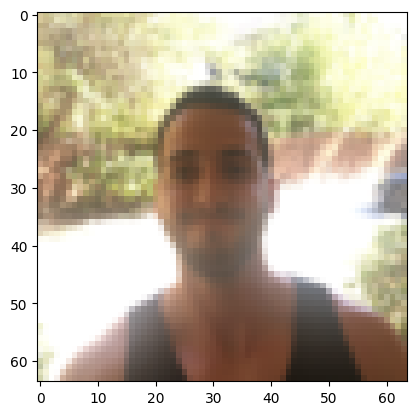

(64, 64, 3)

In [8]:
index = 15
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

Y_train[index]
X_train[15].shape

<a name='3'></a>
## 3 - The Sequenstial API

<a name='3-1'></a>
### 3.1 - Happy Model

In [13]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            tfl.Conv2D(filters=32,kernel_size =7, strides = (1,1), input_shape = [64,64,3]),
            tfl.BatchNormalization(axis = 3),
            tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
            tfl.MaxPool2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),        
            tfl.Flatten(),
            tfl.Dense(units = 1,activation= "sigmoid")
            
        ])
    
    return model

In [15]:
happy_model = happyModel()

happy_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_2 (ZeroPadding2D)     │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

<a name='2-2'></a>
### 2.2 - Train and Evaluate the Model

In [17]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [18]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6283 - loss: 1.9955
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9032 - loss: 0.2604
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8875 - loss: 0.2960
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9165 - loss: 0.2403
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9423 - loss: 0.1970
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9656 - loss: 0.0753
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9500 - loss: 0.1298
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9750 - loss: 0.1044
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9819 - loss: 0.0740
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9279 - loss: 0.2002


In [19]:
happy_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9453 - loss: 0.1429


[0.14612756669521332, 0.9466666579246521]

<a name='4'></a>
## 4 - Sign Data

<a name='4-1'></a>
### 4.1 - Load and Split the Data into Train/Test Sets

In [26]:
def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [27]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<a name='4-2'></a>
### 4.2 - Sign data image display

y = 3


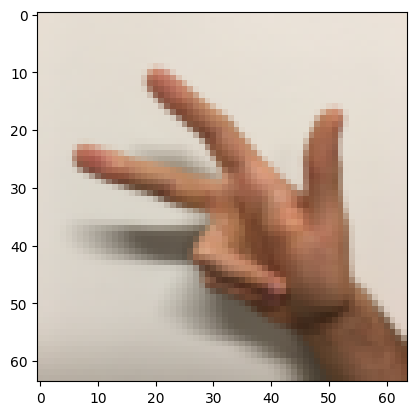

In [47]:
# Example of an image from the dataset
index = 27
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [29]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='5'></a>
## 5 - The Functional API

<a name='5-1'></a>
### 5.1 - Convolutional model

In [30]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    
    Z1 = tfl.Conv2D(filters = 8,kernel_size = 4, strides = (1,1), padding = 'same')(input_img)    
    A1 = tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(Z1)    
    P1 = tfl.MaxPool2D(pool_size =(8,8),strides = 8, padding ='same')(A1)    
    Z2 = tfl.Conv2D(filters = 16,kernel_size = 2, strides = (1,1), padding = 'same')(P1)    
    A2 = tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(Z2)    
    P2 = tfl.MaxPool2D(pool_size =(4,4),strides = 4, padding ='same')(A2)    
    F = tfl.Flatten()(P2)    
    outputs = tfl.Dense(units = 6, activation= "softmax")(F)    
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [31]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

<a name='5-2'></a>
### 5.2 - Train the model

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1636 - loss: 1.8000 - val_accuracy: 0.1750 - val_loss: 1.7932
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1816 - loss: 1.7904 - val_accuracy: 0.1750 - val_loss: 1.7897
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1999 - loss: 1.7877 - val_accuracy: 0.2583 - val_loss: 1.7852
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2768 - loss: 1.7838 - val_accuracy: 0.2917 - val_loss: 1.7797
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3175 - loss: 1.7791 - val_accuracy: 0.3083 - val_loss: 1.7743
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3595 - loss: 1.7737 - val_accuracy: 0.3583 - val_loss: 1.7671
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3901 - loss: 1.7659 - val_accuracy: 0.3167 - val_loss: 1.7581
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3762 - loss: 1.7554 - val_accuracy: 0.

<a name='6'></a>
## 6 - History Object 

In [33]:
history.history

{'accuracy': [0.14907407760620117,
  0.1814814805984497,
  0.20370370149612427,
  0.28148147463798523,
  0.31018519401550293,
  0.34166666865348816,
  0.35370370745658875,
  0.364814817905426,
  0.36666667461395264,
  0.385185182094574,
  0.4027777910232544,
  0.42592594027519226,
  0.4472222328186035,
  0.46759259700775146,
  0.49166667461395264,
  0.49259260296821594,
  0.5074074268341064,
  0.5222222208976746,
  0.5351851582527161,
  0.5537037253379822,
  0.5712962746620178,
  0.5879629850387573,
  0.6009259223937988,
  0.6120370626449585,
  0.625,
  0.6277777552604675,
  0.6398147940635681,
  0.6462963223457336,
  0.654629647731781,
  0.6638888716697693,
  0.6722221970558167,
  0.6787037253379822,
  0.6824073791503906,
  0.6824073791503906,
  0.6851851940155029,
  0.6916666626930237,
  0.6972222328186035,
  0.7018518447875977,
  0.7092592716217041,
  0.7129629850387573,
  0.7157407402992249,
  0.7222222089767456,
  0.7277777791023254,
  0.730555534362793,
  0.729629635810852,
  0.7

In [38]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss_acc.head()


,accuracy,loss,val_accuracy,val_loss
0,0.149074,1.798189,0.175000,1.793181
1,0.181481,1.790451,0.175000,1.789676
2,0.203704,1.787074,0.258333,1.785174
3,0.281481,1.783054,0.291667,1.779652
4,0.310185,1.778355,0.308333,1.774271


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

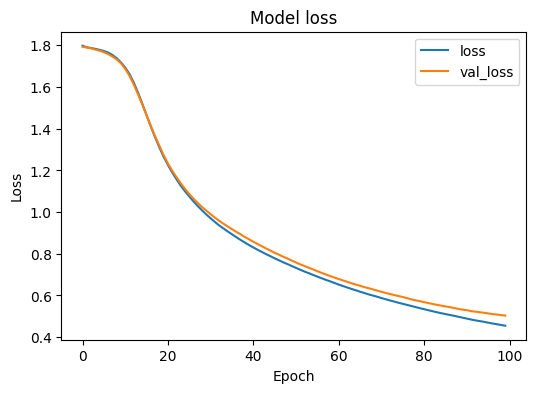

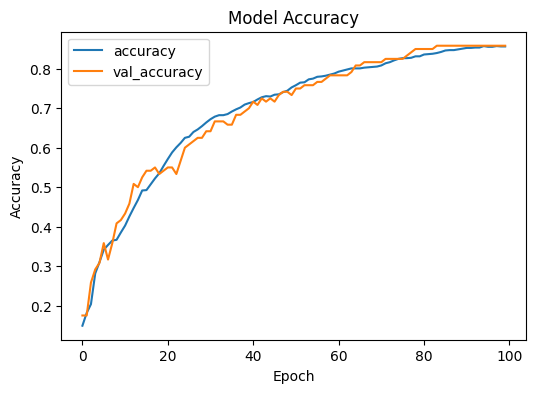

In [41]:
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=False)


df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=False)


df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')


<a name='7'></a>
## 7 - Bibliography

You're always encouraged to read the official documentation. To that end, you can find the docs for the Sequential and Functional APIs here: 

https://www.tensorflow.org/guide/keras/sequential_model

https://www.tensorflow.org/guide/keras/functional